In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [ ]:
#data set link
#https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content/drive/MyDrive/workshop_program/code_notebook/data_set')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras import layers


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/workshop_program/code_notebook/data_set/train',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/workshop_program/code_notebook/data_set/test',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
img_height = 256
img_width = 256
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 352ms/step - accuracy: 0.5635 - loss: 0.6892 - val_accuracy: 0.6980 - val_loss: 0.5746
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 172ms/step - accuracy: 0.7087 - loss: 0.5642 - val_accuracy: 0.7604 - val_loss: 0.4891
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 169ms/step - accuracy: 0.7620 - loss: 0.4958 - val_accuracy: 0.7772 - val_loss: 0.4638
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 180ms/step - accuracy: 0.7863 - loss: 0.4518 - val_accuracy: 0.8186 - val_loss: 0.4070
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 208ms/step - accuracy: 0.8010 - loss: 0.4234 - val_accuracy: 0.8222 - val_loss: 0.4022
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 180ms/step - accuracy: 0.8197 - loss: 0.3995 - val_accuracy: 0.8304 - val_loss: 0.3754
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 174ms/step - accuracy: 0.8315 - loss: 0.3771 - val_accuracy: 0.8466 - val_loss: 0.3523
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.8404 -

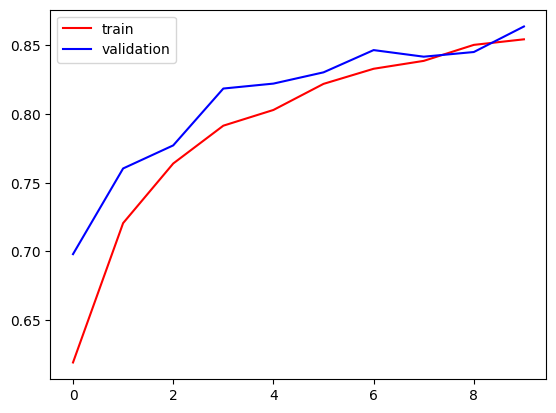

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

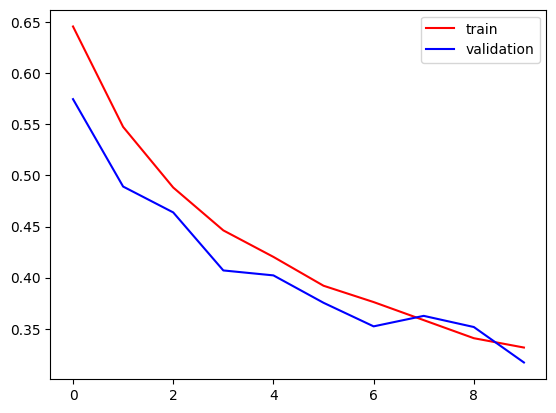

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/workshop_program/code_notebook/trained_models/dog_vs_cat.keras")

In [ ]:
import numpy as np
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/workshop_program/code_notebook/trained_models/dog_vs_cat.keras')

# Inference function
def predict_image(image_path):
    img = load_and_preprocess_image(image_path)
    prediction = model.predict(img)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return label, confidence

# Example usage
image_path = "/content/download.jpg"
label, confidence = predict_image(image_path)
print(f"Prediction: {label} with {confidence:.2%} confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Prediction: Cat with 100.00% confidence


# Transfer Learning

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [ ]:
# Load InceptionV3 base model
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

In [ ]:
base_model.trainable = False

In [ ]:
# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 192ms/step - accuracy: 0.9685 - loss: 0.0882 - val_accuracy: 0.9904 - val_loss: 0.0302
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9908 - val_loss: 0.0307
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 173ms/step - accuracy: 0.9905 - loss: 0.0267 - val_accuracy: 0.9912 - val_loss: 0.0248
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 206ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 205ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9908 - val_loss: 0.0278
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 334ms/step - accuracy: 0.9928 - loss: 0.0209 - val_accuracy: 0.9914 - val_loss: 0.0291
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9908 - val_loss: 0.0301
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 175ms/step - accuracy: 0.9927 -

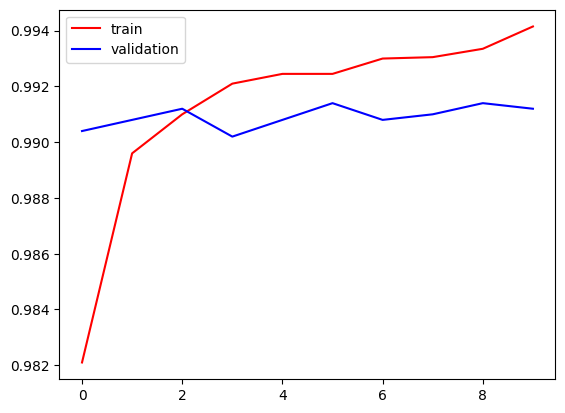

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

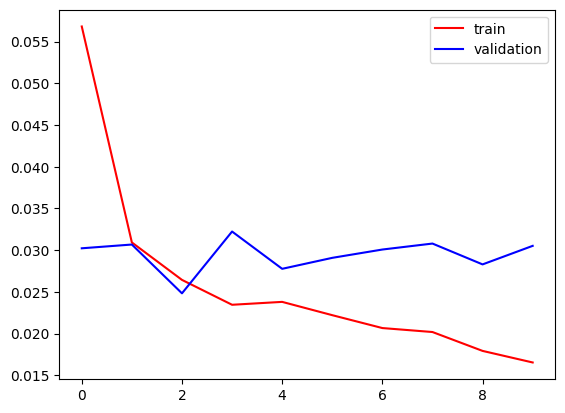

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('incep_dog_cat_classifier.h5')